<a href="https://colab.research.google.com/github/me-smishra27/Telecom_Churn_Analysis/blob/main/Team_Power_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
file_path = '/content/drive/MyDrive/Colab Notebooks/Cohort_Himalaya_AlmaBetter/Capstone_Telecom_Churn_Analysis/Telecom Churn.csv'
telecom_df=pd.read_csv(file_path)

In [4]:
telecom_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [5]:
telecom_df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:
telecom_df.shape

(3333, 20)

In [7]:
telecom_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [8]:
telecom_df['Churn'] = telecom_df['Churn'].astype('int64')

In [9]:
telecom_df.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856,0.144914
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491,0.352067
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000,0.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000,0.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000,0.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000,1.000000


##A “churn” with respect to the Telecom industry, is defined as the percentage of subscribers moving from a specific service or a service provider to another in a given period of time.

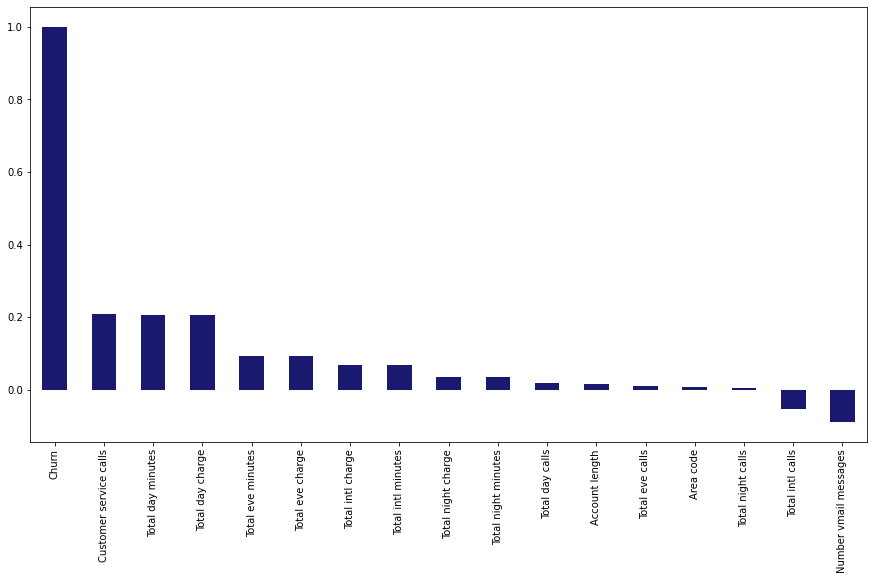

In [10]:
plt.figure(figsize=(15,8))
telecom_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'midnightblue')

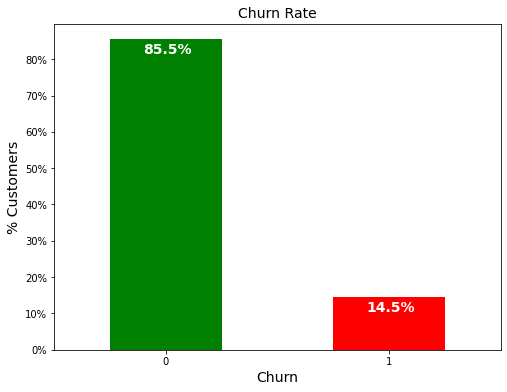

In [11]:
colors = ['Green','Red']
churn_per = (telecom_df['Churn'].value_counts()*100.0 /len(telecom_df)).plot(kind='bar',
                                                                           stacked = True,
                                                                          rot = 0,
                                                                          color = colors,
                                                                         figsize = (8,6))

churn_per.set_ylabel('% Customers',size = 14)
churn_per.set_xlabel('Churn',size = 14)
churn_per.set_title('Churn Rate', size = 14)
churn_per.yaxis.set_major_formatter(mtick.PercentFormatter())

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in churn_per.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in churn_per.patches:
# get_width pulls left or right; get_y pushes up or down
    churn_per.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

In [12]:
telecom_df[telecom_df['Churn']== 1]

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
10,IN,65,415,No,No,0,129.1,137,21.95,228.5,83,19.42,208.8,111,9.40,12.7,6,3.43,4,1
15,NY,161,415,No,No,0,332.9,67,56.59,317.8,97,27.01,160.6,128,7.23,5.4,9,1.46,4,1
21,CO,77,408,No,No,0,62.4,89,10.61,169.9,121,14.44,209.6,64,9.43,5.7,6,1.54,5,1
33,AZ,12,408,No,No,0,249.6,118,42.43,252.4,119,21.45,280.2,90,12.61,11.8,3,3.19,1,1
41,MD,135,408,Yes,Yes,41,173.1,85,29.43,203.9,107,17.33,122.2,78,5.50,14.6,15,3.94,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3301,CA,84,415,No,No,0,280.0,113,47.60,202.2,90,17.19,156.8,103,7.06,10.4,4,2.81,0,1
3304,IL,71,510,Yes,No,0,186.1,114,31.64,198.6,140,16.88,206.5,80,9.29,13.8,5,3.73,4,1
3320,GA,122,510,Yes,No,0,140.0,101,23.80,196.4,77,16.69,120.1,133,5.40,9.7,4,2.62,4,1
3322,MD,62,408,No,No,0,321.1,105,54.59,265.5,122,22.57,180.5,72,8.12,11.5,2,3.11,4,1


In [13]:
telecom_df.head(17)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,0
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,0
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,0
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,0
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,0


In [14]:
telecom_df['State'].value_counts()

WV    106
MN     84
NY     83
AL     80
OH     78
WI     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
UT     72
TX     72
IN     71
KS     70
MD     70
NJ     68
NC     68
MT     68
WA     66
NV     66
CO     66
MA     65
RI     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SD     60
SC     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: State, dtype: int64

In [15]:
grouped_df = pd.DataFrame(telecom_df.groupby(['State', 'Churn'], as_index = False)['Churn'].count())

In [16]:
telecom_df.groupby('State')['Churn'].count().sort_values()

State
CA     34
IA     44
PA     45
LA     51
AK     52
TN     53
HI     53
DC     54
GA     54
AR     55
NH     56
IL     58
KY     59
SD     60
SC     60
OK     61
DE     61
NE     61
ND     62
NM     62
ME     62
FL     63
MO     63
AZ     64
RI     65
MS     65
MA     65
WA     66
CO     66
NV     66
MT     68
NC     68
NJ     68
MD     70
KS     70
IN     71
TX     72
UT     72
ID     73
MI     73
VT     73
CT     74
VA     77
WY     77
OR     78
WI     78
OH     78
AL     80
NY     83
MN     84
WV    106
Name: Churn, dtype: int64

In [17]:
grouped_df.sort_values(by = 'Churn', ascending=False)

,State,Churn
98,WV,96
2,AL,72
90,VA,72
96,WI,71
46,MN,69
...,...,...
37,LA,4
7,AZ,4
23,HI,3
25,IA,3


In [18]:
telecom_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [19]:
working_df = telecom_df.drop([ 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge',], axis =1 )

In [20]:
working_df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total eve minutes,Total eve calls,Total eve charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,197.4,99,16.78,1,0
1,OH,107,415,No,Yes,26,195.5,103,16.62,1,0
2,NJ,137,415,No,No,0,121.2,110,10.30,0,0
3,OH,84,408,Yes,No,0,61.9,88,5.26,2,0
4,OK,75,415,Yes,No,0,148.3,122,12.61,3,0


In [21]:
working_df.drop('Area code', axis = 1).describe()

,Account length,Number vmail messages,Total eve minutes,Total eve calls,Total eve charge,Customer service calls,Churn
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,200.980348,100.114311,17.083540,1.562856,0.144914
std,39.822106,13.688365,50.713844,19.922625,4.310668,1.315491,0.352067
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,0.000000,166.600000,87.000000,14.160000,1.000000,0.000000
50%,101.000000,0.000000,201.400000,100.000000,17.120000,1.000000,0.000000
75%,127.000000,20.000000,235.300000,114.000000,20.000000,2.000000,0.000000
max,243.000000,51.000000,363.700000,170.000000,30.910000,9.000000,1.000000


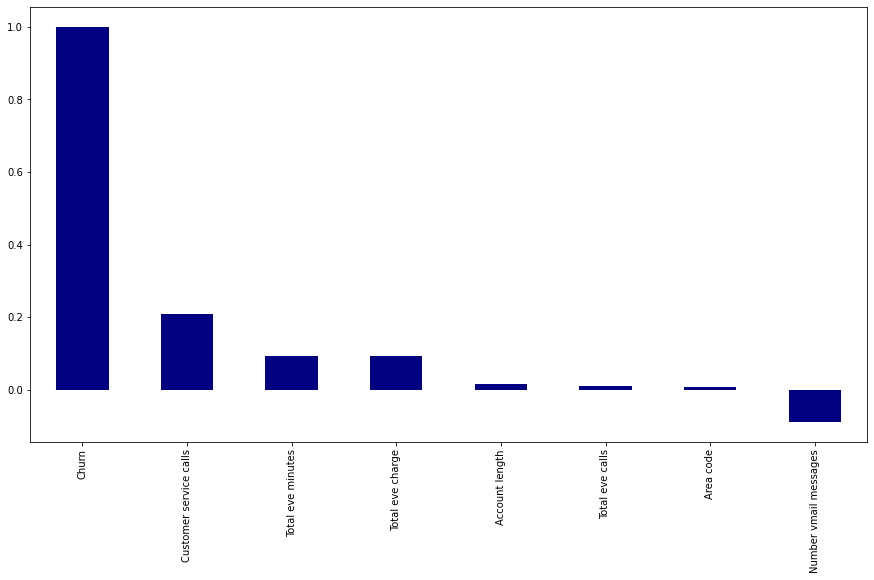

In [22]:
plt.figure(figsize=(15,8))
working_df.corr()['Churn'].sort_values(ascending = False).plot(kind='bar', color = 'navy')

In [23]:
working_df[working_df['Churn'] == 1].mean()

Account length            102.664596
Area code                 437.817805
Number vmail messages       5.115942
Total eve minutes         212.410145
Total eve calls           100.561077
Total eve charge           18.054969
Customer service calls      2.229814
Churn                       1.000000
dtype: float64

##Average eve minutes spent, avg  eve charge and avg eve calls by churned users


In [24]:
working_df[working_df['Churn'] == 1]['Total eve minutes'].mean()

212.41014492753618

In [25]:
working_df[working_df['Churn'] == 1]['Total eve charge'].mean()

18.054968944099382

In [26]:
working_df[working_df['Churn'] == 1]['Total eve calls'].mean()

100.56107660455487

##Average eve minutes spent, avg  eve charge and avg eve calls by loyal users

In [27]:
working_df[working_df['Churn'] == 0]['Total eve minutes'].mean()

199.04329824561412

In [28]:
working_df[working_df['Churn'] == 0]['Total eve charge'].mean()

16.918908771929825

In [29]:
working_df[working_df['Churn'] == 0]['Total eve calls'].mean()

100.03859649122808

In [31]:
working_df.groupby('Area code')['Churn'].value_counts()

Area code  Churn
408        0         716
           1         122
415        0        1419
           1         236
510        0         715
           1         125
Name: Churn, dtype: int64

In [32]:
pd.crosstab(working_df['Churn'], working_df['Area code'], margins = True)

Area code,408,415,510,All
Churn,,,,
0,716,1419,715,2850
1,122,236,125,483
All,838,1655,840,3333


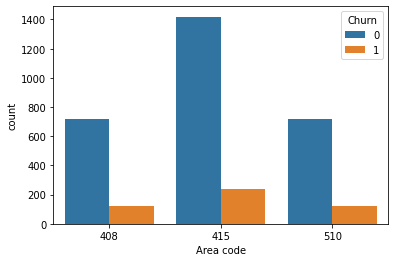

In [33]:
sns.countplot(x = 'Area code', hue= 'Churn', data = working_df)

In [34]:
new_dict = {'No': False, 'Yes': True}
working_df['International plan'] = working_df['International plan'].map(new_dict)

In [35]:
pd.crosstab(working_df['Churn'], working_df['International plan'], margins = True)

International plan,False,True,All
Churn,,,
0,2664,186,2850
1,346,137,483
All,3010,323,3333


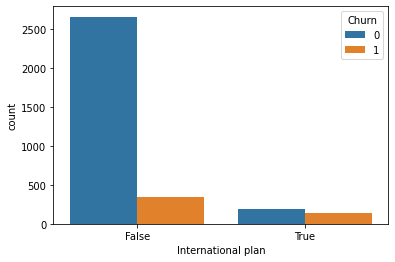

In [36]:
sns.countplot(x = 'International plan', hue= 'Churn', data = working_df)

In [37]:
working_df.groupby('Customer service calls')['Churn'].value_counts()

Customer service calls  Churn
0                       0         605
                        1          92
1                       0        1059
                        1         122
2                       0         672
                        1          87
3                       0         385
                        1          44
4                       0          90
                        1          76
5                       1          40
                        0          26
6                       1          14
                        0           8
7                       1           5
                        0           4
8                       0           1
                        1           1
9                       1           2
Name: Churn, dtype: int64

In [38]:
pd.crosstab(working_df['Churn'], working_df['Customer service calls'], margins = True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
0,605,1059,672,385,90,26,8,4,1,0,2850
1,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


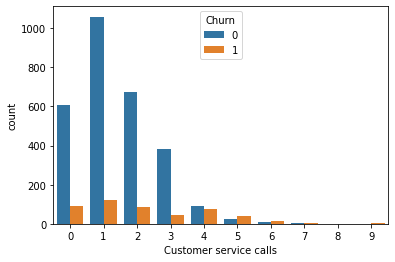

In [39]:
sns.countplot(x = 'Customer service calls', hue = 'Churn', data = working_df)

In [40]:
working_df['Service_calls'] = (working_df['Customer service calls'] > 3).astype('int')

In [41]:
working_df.head(2)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total eve minutes,Total eve calls,Total eve charge,Customer service calls,Churn,Service_calls
0,KS,128,415,False,Yes,25,197.4,99,16.78,1,0,0
1,OH,107,415,False,Yes,26,195.5,103,16.62,1,0,0


In [42]:
pd.crosstab(working_df['Service_calls'], working_df['Churn'], margins = True)

Churn,0,1,All
Service_calls,,,
0,2721,345,3066
1,129,138,267
All,2850,483,3333


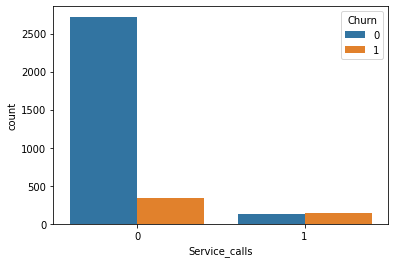

In [43]:
sns.countplot(x = 'Service_calls', hue = 'Churn', data = working_df)

In [44]:
working_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Customer service calls',
       'Churn', 'Service_calls'],
      dtype='object')

In [45]:
working_df['Voice mail plan'] = working_df['Voice mail plan'].map(new_dict)

In [46]:
pd.crosstab(working_df['Churn'], working_df['Voice mail plan'], margins = True)

Voice mail plan,False,True,All
Churn,,,
0,2008,842,2850
1,403,80,483
All,2411,922,3333


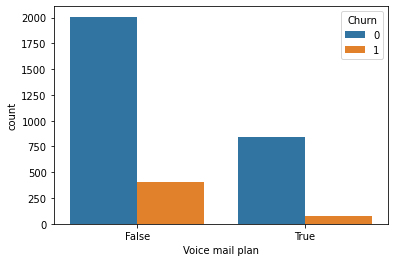

In [47]:
sns.countplot(x = 'Voice mail plan', hue = 'Churn', data = working_df)

In [48]:
pd.crosstab(working_df['Churn'], working_df['Number vmail messages'], margins = True)

Number vmail messages,0,4,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2008,1,2,2,1,2,6,4,7,8,12,13,5,18,20,26,30,36,41,37,35,41,45,45,42,55,35,40,27,28,30,27,24,30,15,10,11,9,5,5,4,3,1,1,2,1,2850
1,403,0,0,0,0,0,0,0,0,1,1,1,2,1,2,2,2,0,1,0,6,3,6,8,2,5,6,6,2,4,4,2,1,0,1,3,4,0,2,1,0,0,1,0,0,0,483
All,2411,1,2,2,1,2,6,4,7,9,13,14,7,19,22,28,32,36,42,37,41,44,51,53,44,60,41,46,29,32,34,29,25,30,16,13,15,9,7,6,4,3,2,1,2,1,3333


In [49]:
working_df['Account length'].value_counts()

105    43
87     42
93     40
101    40
90     39
       ..
191     1
199     1
215     1
221     1
2       1
Name: Account length, Length: 212, dtype: int64

In [50]:
pd.crosstab(working_df['Churn'], working_df['Account length'], margins = True)

Account length,1,2,3,4,5,6,7,8,9,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,...,175,176,177,178,179,180,181,182,183,184,185,186,188,189,190,191,192,193,194,195,196,197,199,200,201,202,204,205,208,209,210,212,215,217,221,224,225,232,243,All
Churn,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,7,0,5,1,1,2,2,1,3,3,4,2,8,3,7,2,2,4,3,7,6,2,5,4,1,8,5,4,8,7,7,9,6,8,13,11,8,6,6,13,...,1,6,7,2,5,4,4,4,5,3,6,2,0,6,7,1,3,3,3,2,2,2,1,1,2,1,2,2,0,2,2,1,1,2,1,1,1,1,1,2850
1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,1,2,0,1,0,1,0,2,3,1,0,1,1,1,0,0,0,1,1,1,1,2,1,1,3,1,...,0,0,2,1,1,1,1,2,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,1,0,0,483
All,8,1,5,1,1,2,2,1,3,3,4,3,9,3,8,4,2,5,3,8,6,4,8,5,1,9,6,5,8,7,7,10,7,9,14,13,9,7,9,14,...,1,6,9,3,6,5,5,6,5,4,6,2,1,6,7,1,3,4,3,2,2,3,1,1,3,1,2,2,1,3,2,2,1,2,1,2,2,1,1,3333


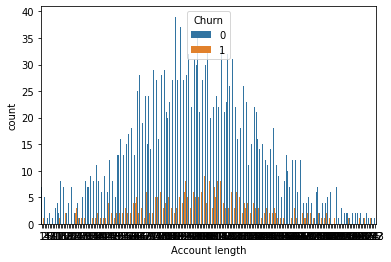

In [51]:
sns.countplot(x = 'Account length', hue = 'Churn', data = working_df)

In [52]:
working_df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Customer service calls',
       'Churn', 'Service_calls'],
      dtype='object')